In [44]:
import pandas as pd

# Load the dataset
file_path = 'CLV_scores_clean.csv'
clv_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
clv_data.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,...,Inc_Crs,Age,Home_Value,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV,,margin_grp,quadrant_retention_margin
0,SC,29607,567,864,1,1,1,0,0,3,...,15000,40,1,0.522745,4.701471,288.738105,203.208843,1L,1L,1L_1L
1,MO,63901,632,573,1,1,1,0,0,9,...,1,40,50000,0.905883,4.701471,288.738105,26.999462,1L,1L,1L_1L
2,IL,60456,602,missing,0,1,1,0,0,1,...,1,60,1,0.084247,4.702374,393.412150,827.163983,2H,2H,2H_2H
3,FL,34698,539,727,1,1,1,0,0,9,...,50000,60,150000,0.952144,4.702310,385.967803,17.553964,1L,2H,1L_2H
4,CA,92084,825,760,0,1,1,0,0,1,...,100000,50,350000,0.286805,4.701676,312.470059,419.109402,1L,1L,1L_1L


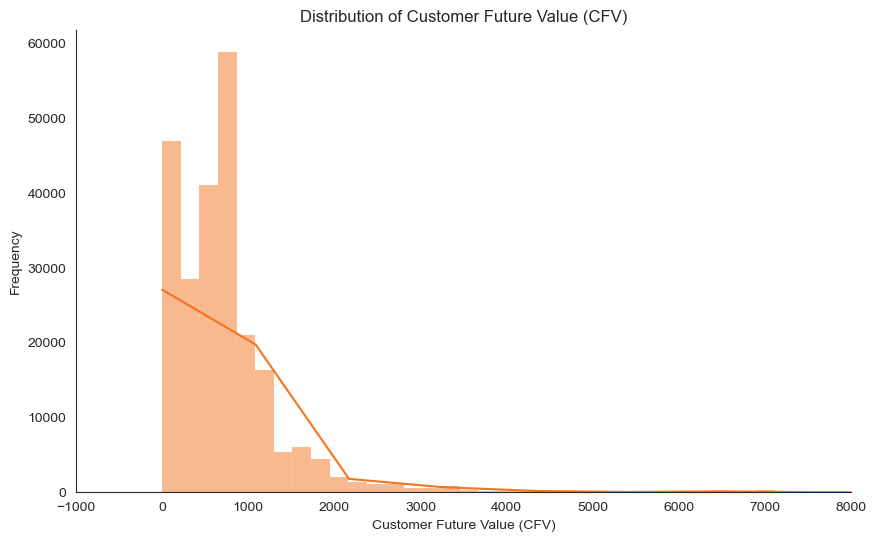

In [60]:
sns.set_style("white")

# Plotting the distribution of CFV
plt.figure(figsize=(10, 6))
sns.histplot(clv_data['CFV'], bins=1000, kde=True)
plt.title('Distribution of Customer Future Value (CFV)')
plt.xlabel('Customer Future Value (CFV)')
plt.ylabel('Frequency')

# Set the x-axis range
plt.xlim(-1000, 8000)

# Remove top and right side outline
sns.despine()

plt.show()

<Axes: title={'center': 'Number of Customers by State'}, xlabel='State', ylabel='Number of Customers'>

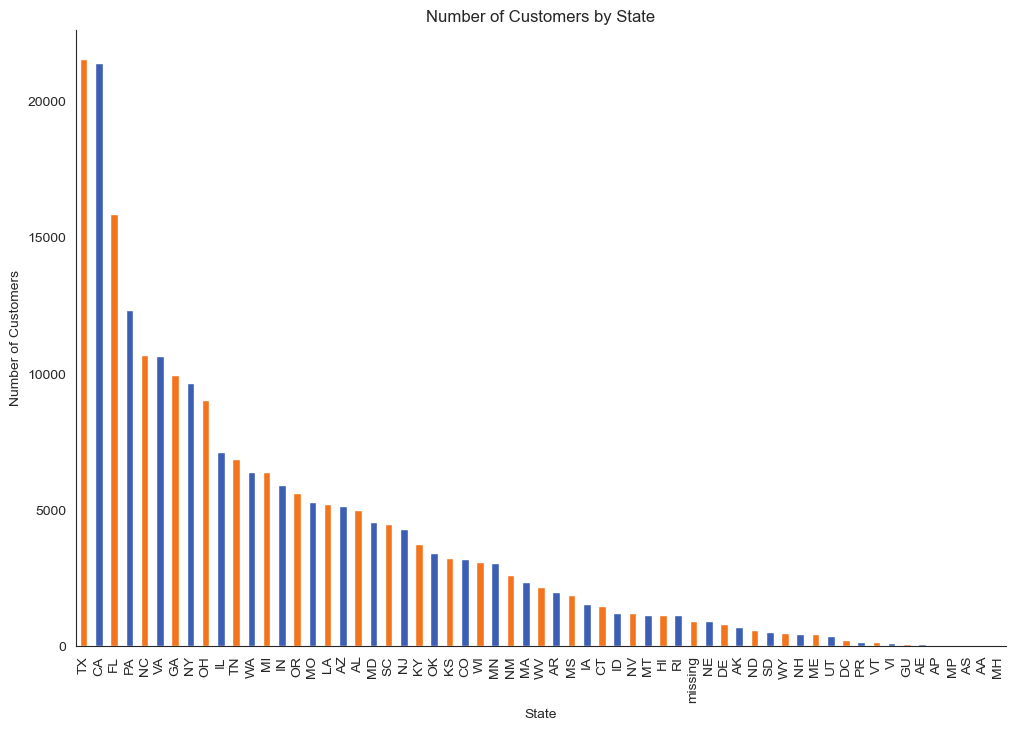

In [61]:
sns.set_style("white")
plt.figure(figsize=(12, 8))
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Remove top and right lines
sns.despine()

customer_counts_by_state.plot(kind='bar', color=['#F4741E', '#3C5FB5'])


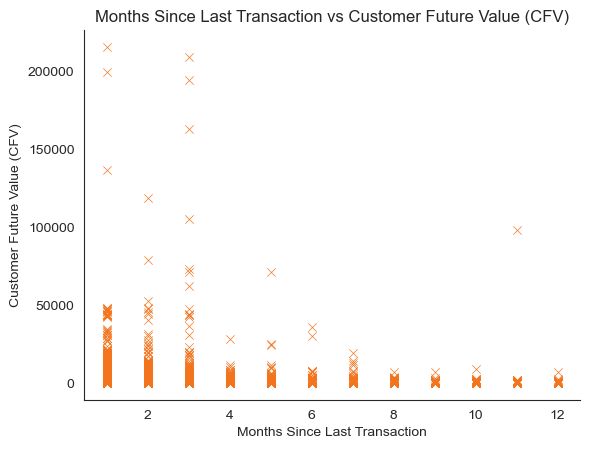

In [62]:
sns.scatterplot(x=clv_data['months_since_last_trans'], y=clv_data['CFV'], color=['#F4741E'], marker='x')
plt.title('Months Since Last Transaction vs Customer Future Value (CFV)')
plt.xlabel('Months Since Last Transaction')
plt.ylabel('Customer Future Value (CFV)')
sns.despine()
plt.show()


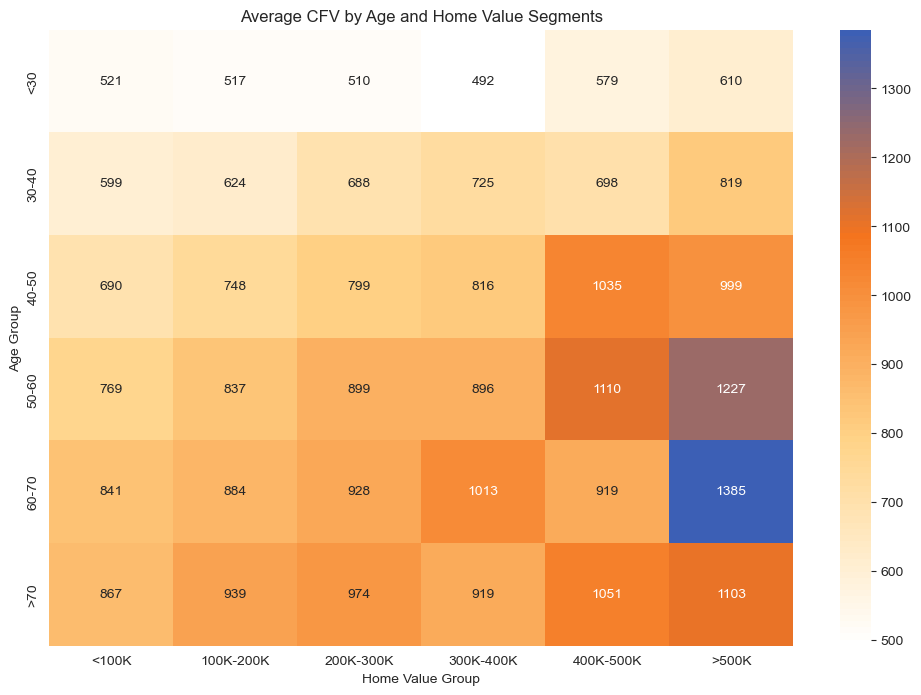

In [57]:
from matplotlib.colors import LinearSegmentedColormap

# Assuming clv_data is already defined and contains the necessary columns

clv_data['Age_Group'] = pd.cut(clv_data['Age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '>70'])

clv_data['Home_Value_Group'] = pd.cut(clv_data['Home_Value'], bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000], labels=['<100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '>500K'], include_lowest=True)

segmented_avg_cfv = clv_data.groupby(['Age_Group', 'Home_Value_Group'])['CFV'].mean().unstack()

# Create a custom colormap
colors = ["#ffffff",'#FFD387', "#F4741E", "#3C5FB5"]  # White to #F4741E to #3C5FB5
n_bins = 100  # Increase this number for a smoother transition
cmap_name = 'custom1'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(12, 8))
sns.heatmap(segmented_avg_cfv, annot=True, fmt=".0f", cmap=cm)
plt.title('Average CFV by Age and Home Value Segments')
plt.xlabel('Home Value Group')
plt.ylabel('Age Group')
plt.show()

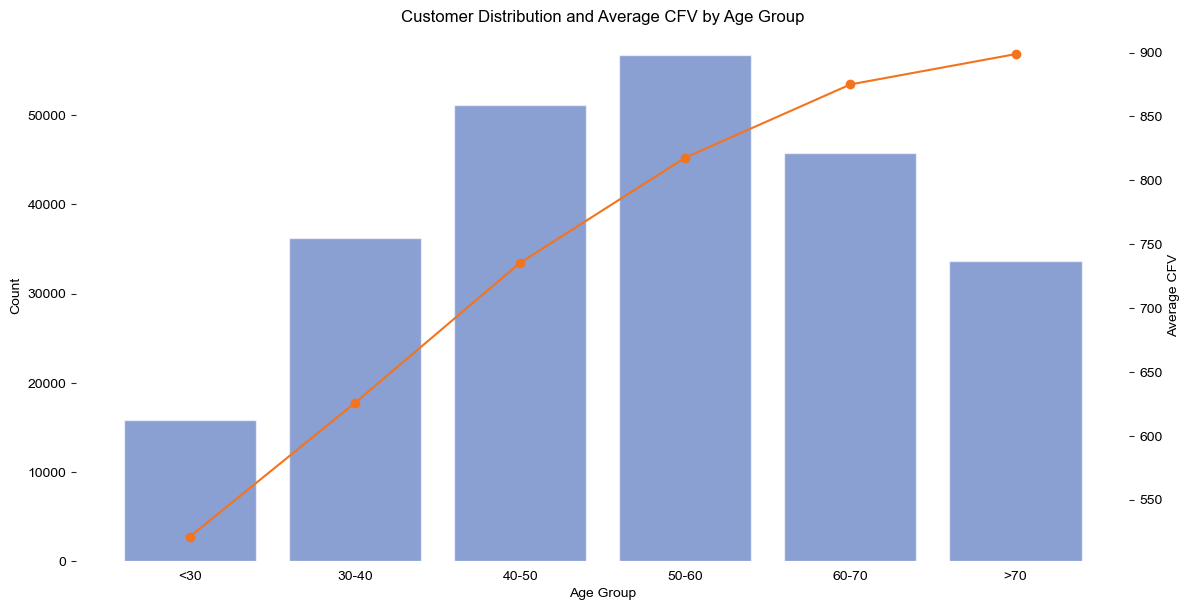

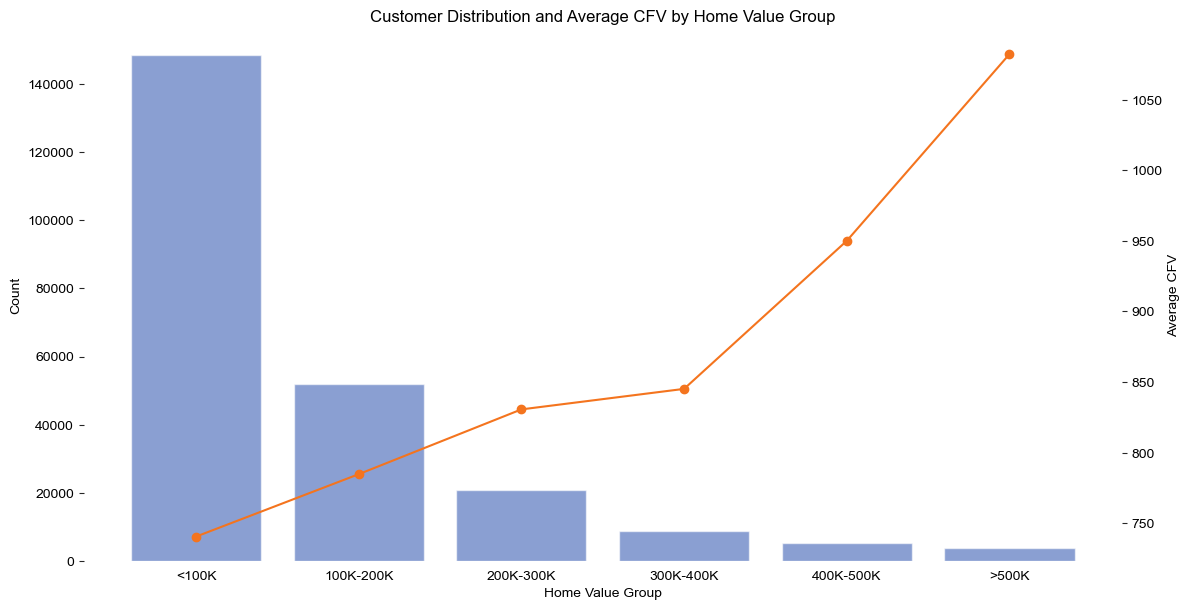

In [78]:
# Plotting Age Distribution and Average CFV by Age Group
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Age Group', color='black')  # Set x-axis label color to black
ax1.set_ylabel('Count', color='black')  # Set y-axis label color to black
# Apply the blue color #3C5FB5 for the bars
ax1.bar(age_group_counts.index.astype(str), age_group_counts, color='#3C5FB5', alpha=0.6, label='Count')
ax1.tick_params(axis='y', labelcolor='black')  # Set y-axis tick label color to black
ax1.tick_params(axis='x', labelcolor='black')  # Set x-axis tick label color to black

# Remove outlines
for spine in ax1.spines.values():
    spine.set_visible(False)

ax2 = ax1.twinx()
ax2.set_ylabel('Average CFV', color='black')  # Set y-axis label color to black
# Apply the orange color #F4741E for the line plot
ax2.plot(age_group_counts.index.astype(str), age_group_avg_cfv, color='#F4741E', marker='o', label='Average CFV')
ax2.tick_params(axis='y', labelcolor='black')  # Set y-axis tick label color to black

# Remove outlines
for spine in ax2.spines.values():
    spine.set_visible(False)

fig.tight_layout()
plt.title('Customer Distribution and Average CFV by Age Group', color='black')  # Set title color to black
plt.show()

# Plotting Home Value Distribution and Average CFV by Home Value Group
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Home Value Group', color='black')  # Set x-axis label color to black
ax1.set_ylabel('Count', color='black')  # Set y-axis label color to black
# Apply the blue color #3C5FB5 for the bars
ax1.bar(home_value_group_counts.index.astype(str), home_value_group_counts, color='#3C5FB5', alpha=0.6, label='Count')
ax1.tick_params(axis='y', labelcolor='black')  # Set y-axis tick label color to black
ax1.tick_params(axis='x', labelcolor='black')  # Set x-axis tick label color to black

# Remove outlines
for spine in ax1.spines.values():
    spine.set_visible(False)

ax2 = ax1.twinx()
ax2.set_ylabel('Average CFV', color='black')  # Set y-axis label color to black
# Apply the orange color #F4741E for the line plot
ax2.plot(home_value_group_counts.index.astype(str), home_value_group_avg_cfv, color='#F4741E', marker='o', label='Average CFV')
ax2.tick_params(axis='y', labelcolor='black')  # Set y-axis tick label color to black

# Remove outlines
for spine in ax2.spines.values():
    spine.set_visible(False)

fig.tight_layout()
plt.title('Customer Distribution and Average CFV by Home Value Group', color='black')  # Set title color to black
plt.show()


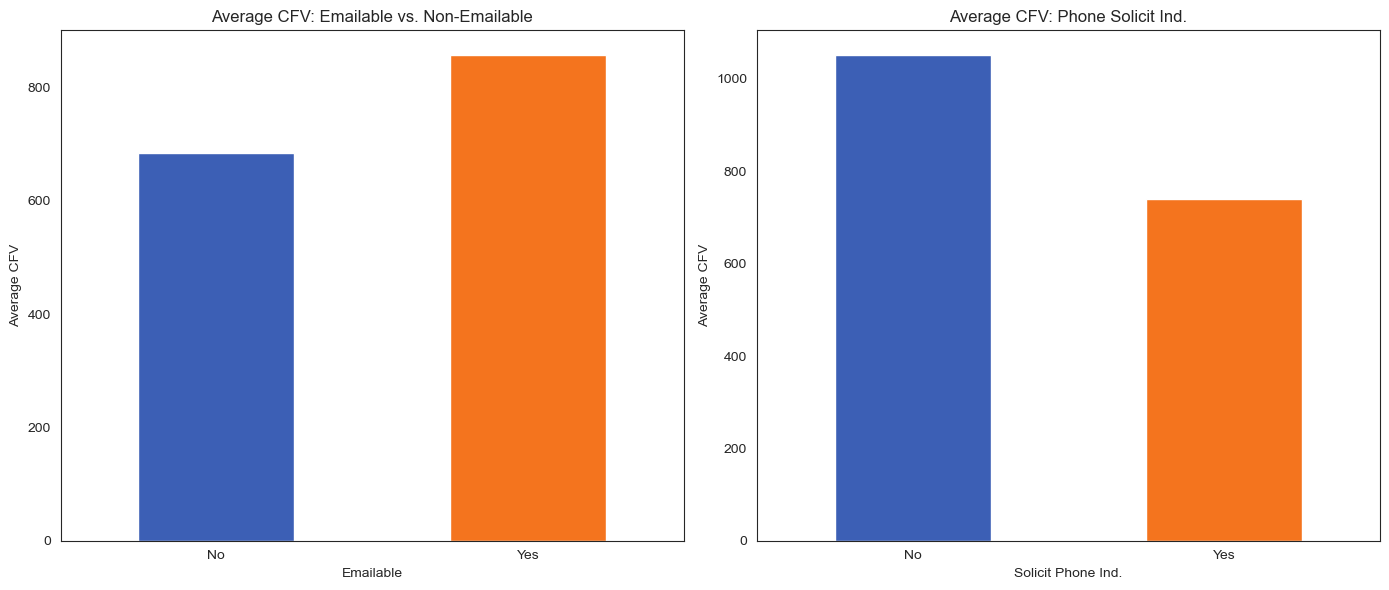

In [79]:
# Average CFV for customers based on phone solicitation indicator
phone_solicit_avg_cfv = clv_data.groupby('solicit_ph_ind')['CFV'].mean()

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for emailable
emailable_avg_cfv.plot(kind='bar', ax=ax[0], color=['#3C5FB5', '#F4741E'])
ax[0].set_title('Average CFV: Emailable vs. Non-Emailable')
ax[0].set_xlabel('Emailable')
ax[0].set_ylabel('Average CFV')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Plot for phone solicitation
phone_solicit_avg_cfv.plot(kind='bar', ax=ax[1], color=['#3C5FB5', '#F4741E'])
ax[1].set_title('Average CFV: Phone Solicit Ind.')
ax[1].set_xlabel('Solicit Phone Ind.')
ax[1].set_ylabel('Average CFV')
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()


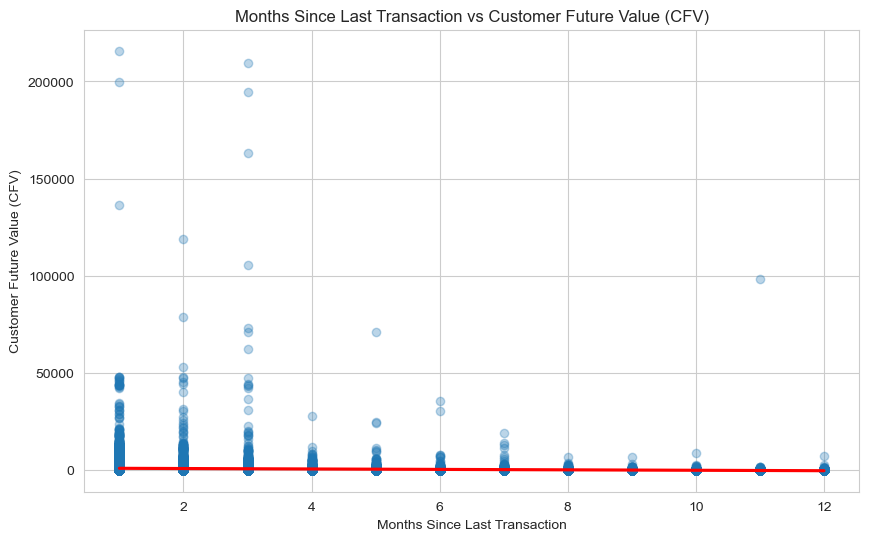

In [30]:
# Scatter plot of months since last transaction vs CFV, with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(x=clv_data['months_since_last_trans'], y=clv_data['CFV'], scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Months Since Last Transaction vs Customer Future Value (CFV)')
plt.xlabel('Months Since Last Transaction')
plt.ylabel('Customer Future Value (CFV)')
plt.show()
